In [1]:
#Necessary installationss
!apt-get install openslide-tools
!pip install openslide-python

zsh:1: command not found: apt-get
  Using cached openslide_python-1.4.2-cp311-abi3-macosx_10_9_universal2.whl.metadata (4.9 kB)
Using cached openslide_python-1.4.2-cp311-abi3-macosx_10_9_universal2.whl (33 kB)


**MAKE SURE TO UPLOAD THE annotation.csv, images.csv and utils files before running the next block. Also rename utils.txt to utils.py.**

In [2]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt

import utils

annot_df = pd.read_csv('/Users/sophiacherkaoui/mitosis/metadata/annotation.csv')
images_df = pd.read_csv('/Users/sophiacherkaoui/mitosis/metadata/images.csv')

print("Annotation data:")
display(annot_df.head())

print("\nImage metadata:")
display(images_df.head())

Annotation data:


,bbox,category_id,image_id,labels,id,bbox_id
0,"[4336, 346, 4386, 396]",2,1,"[2, 2]",1,0
1,"[756, 872, 806, 922]",2,1,"[2, 2]",2,1
2,"[270, 4044, 320, 4094]",2,1,"[2, 2]",3,2
3,"[6672.5, 706.5, 6722.5, 756.5]",2,1,"[2, 1, 2]",4,3
4,"[1872, 319, 1922, 369]",2,2,"[2, 2]",5,0



Image metadata:


,license,file_name,id,width,height,tumor_type
0,1,001.tiff,1,7215,5412,human breast cancer
1,1,002.tiff,2,7215,5412,human breast cancer
2,1,003.tiff,3,7215,5412,human breast cancer
3,1,004.tiff,4,7215,5412,human breast cancer
4,1,005.tiff,5,7215,5412,human breast cancer


In [3]:
IMAGE_ROOT = '/Users/sophiacherkaoui/mitosis/images/'
RES_ROOT = '/Users/sophiacherkaoui/mitosis/'

os.makedirs(IMAGE_ROOT, exist_ok=True)
os.makedirs(RES_ROOT, exist_ok=True)


Upload whatever images you want to preprocess after running the above block.

**DO NOT RUN THE NEXT BLOCK BEFORE DOING SO!!**

In [4]:
IMAGE_ROOT = '/Users/sophiacherkaoui/mitosis/images/'
RES_ROOT = '/Users/sophiacherkaoui/mitosis/scripts/'

try:
    IMAGE_IDS_TO_PROCESS = [int(os.path.splitext(f)[0]) for f in os.listdir(IMAGE_ROOT) if f.endswith('.tiff')]
    print(f"{len(IMAGE_IDS_TO_PROCESS)} images to process: {IMAGE_IDS_TO_PROCESS}")
    for image_id in IMAGE_IDS_TO_PROCESS:
        print(f"Starting patch extraction for image ID: {image_id}")

        utils.extract_patch_per_image(
            image_id=image_id,
            image_root=IMAGE_ROOT,
            res_root=RES_ROOT,
            annot_df=annot_df,
            level=0,
            image_format="tiff"
        )

        print(f"Finished extraction for image ID: {image_id}")

    print("All extractions are completed yayaya!")

except FileNotFoundError:
    print(f"idk something went wrong")

10 images to process: [1, 10, 6, 7, 8, 4, 5, 9, 2, 3]
Starting patch extraction for image ID: 1
Finished extraction for image ID: 1
Starting patch extraction for image ID: 10
Finished extraction for image ID: 10
Starting patch extraction for image ID: 6
Finished extraction for image ID: 6
Starting patch extraction for image ID: 7
Finished extraction for image ID: 7
Starting patch extraction for image ID: 8
Finished extraction for image ID: 8
Starting patch extraction for image ID: 4
Finished extraction for image ID: 4
Starting patch extraction for image ID: 5
Finished extraction for image ID: 5
Starting patch extraction for image ID: 9
Finished extraction for image ID: 9
Starting patch extraction for image ID: 2
Finished extraction for image ID: 2
Starting patch extraction for image ID: 3
Finished extraction for image ID: 3
All extractions are completed yayaya!


Found 25 patches for Image ID: 3.


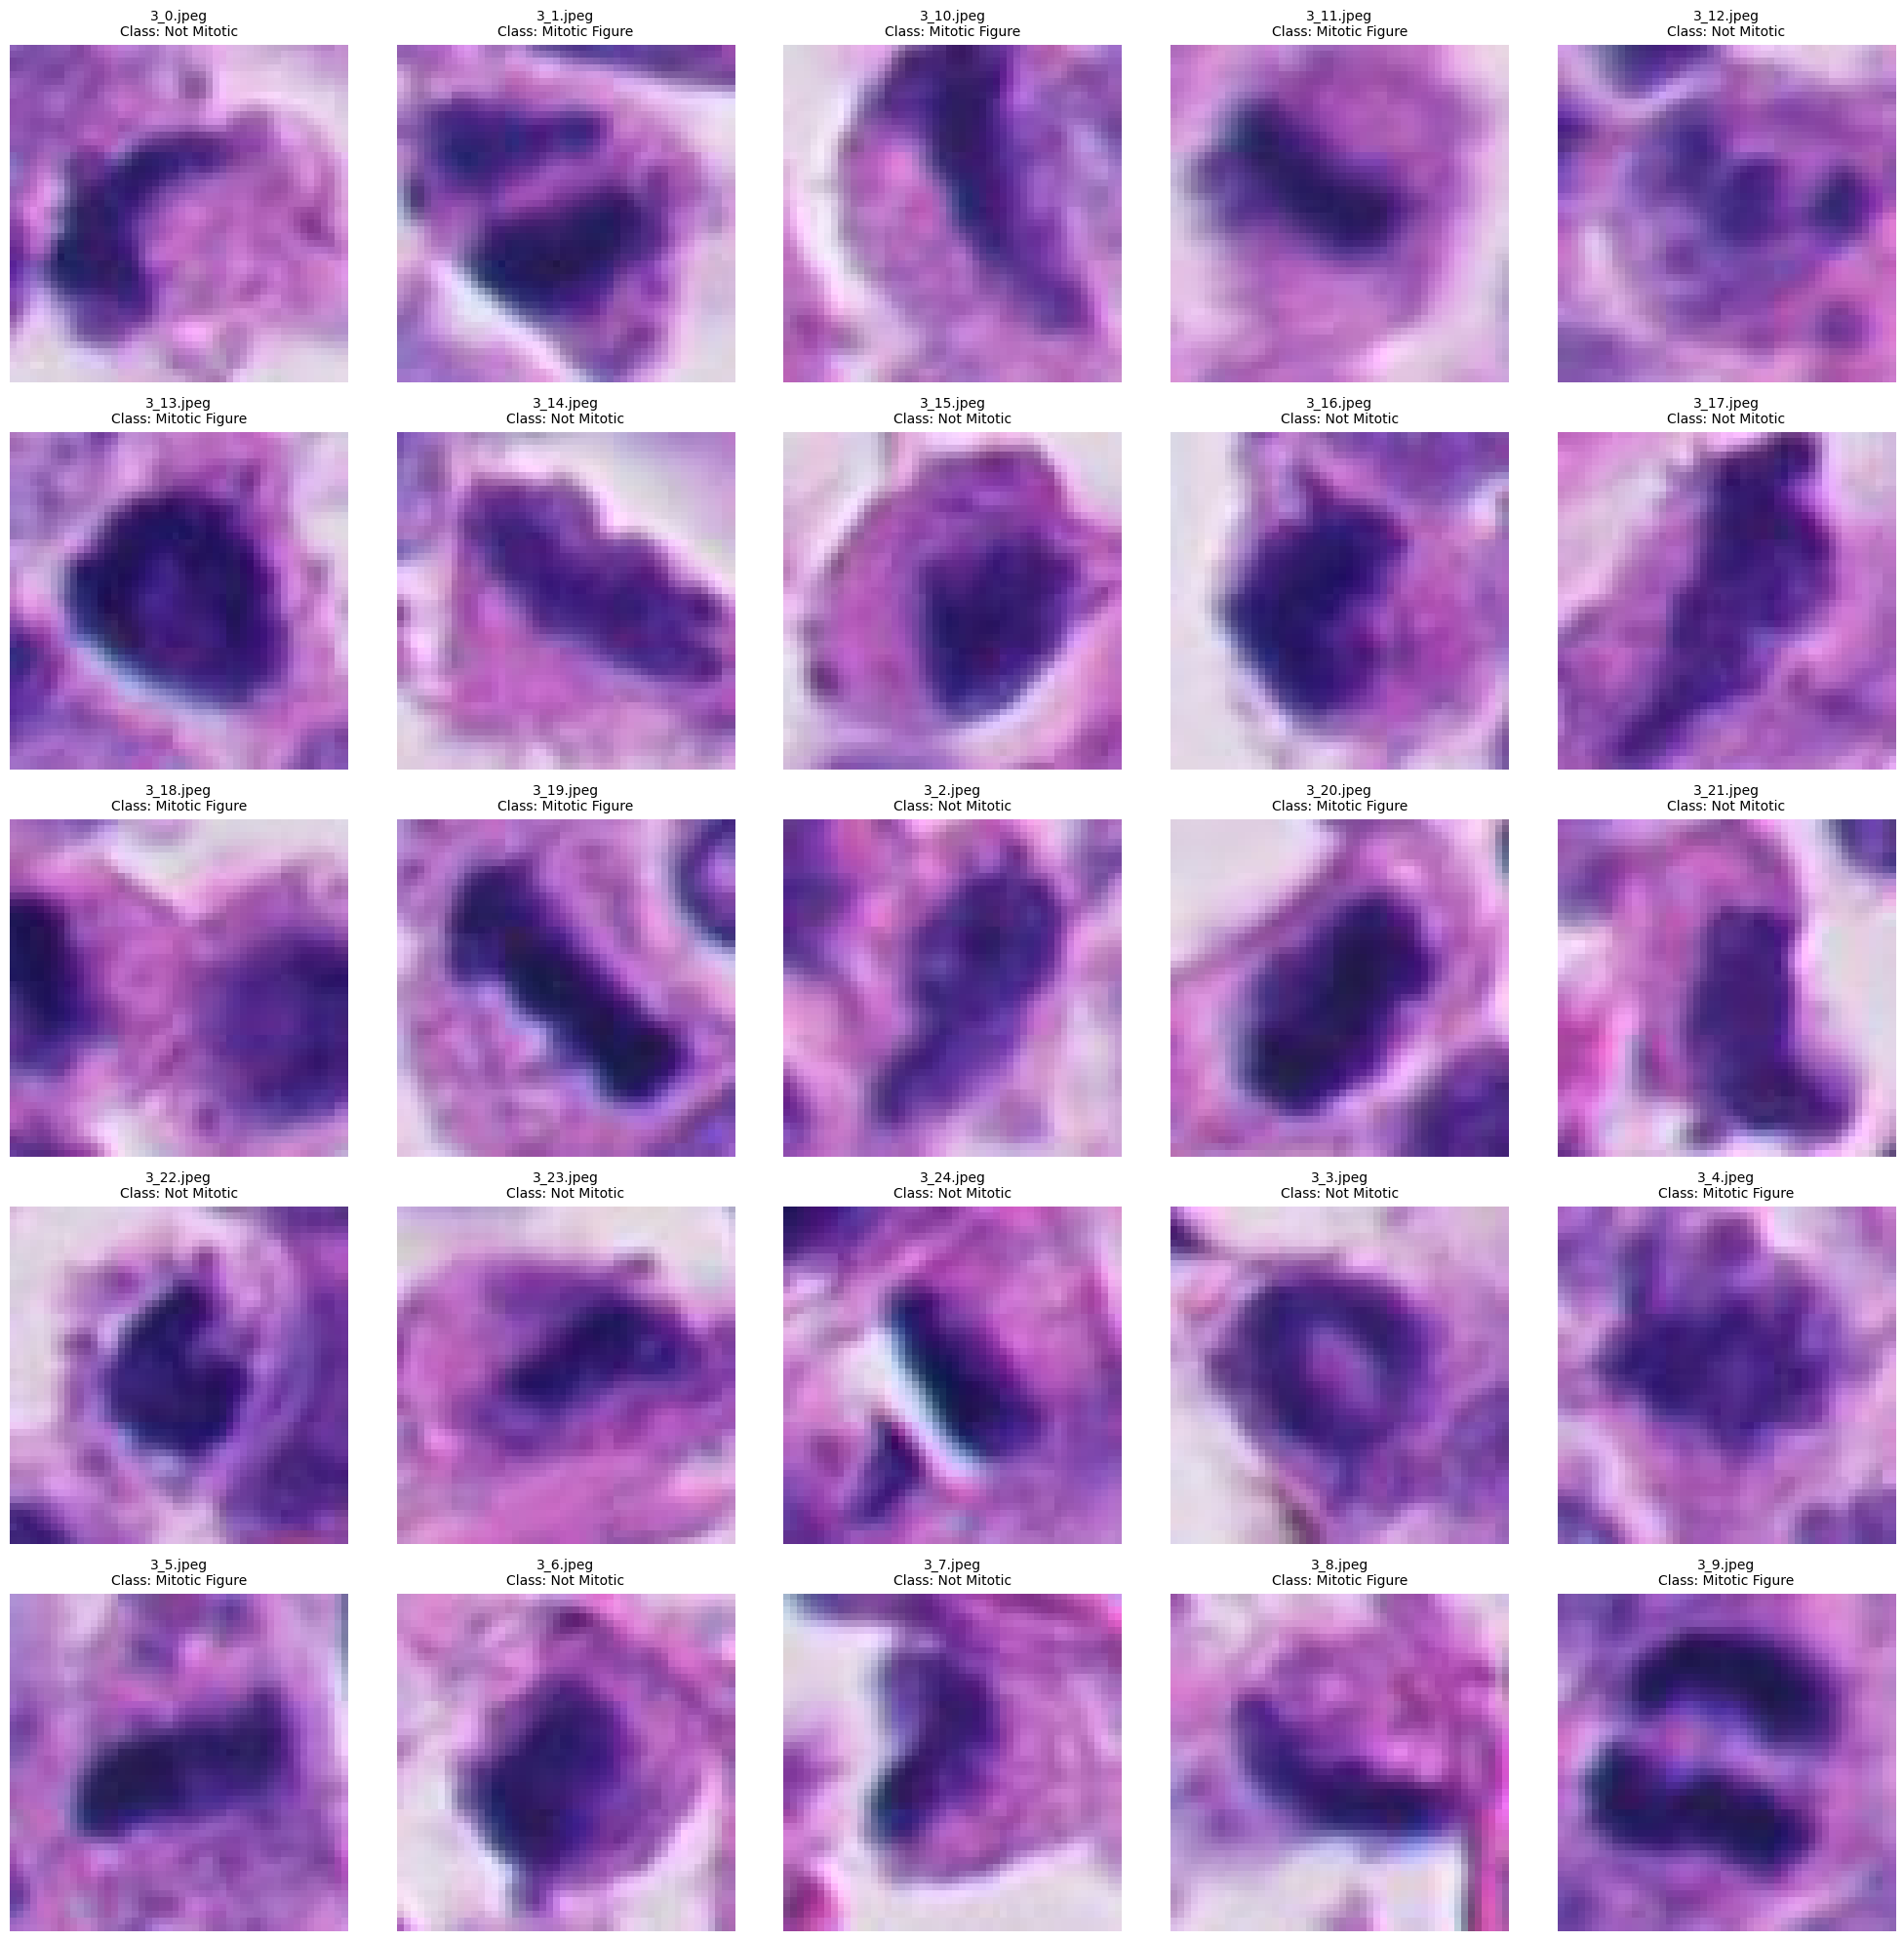

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

IMAGE_ID_TO_DISPLAY = 3
output_patches_base_dir = os.path.join(RES_ROOT, 'patches')
label_map = {1: 'Mitotic Figure', 2: 'Not Mitotic'}
image_dir_path = os.path.join(output_patches_base_dir, str(IMAGE_ID_TO_DISPLAY))

try:

    patch_files = sorted([f for f in os.listdir(image_dir_path) if f.endswith('.jpeg')])
    if not patch_files:
        print(f"No patch files found in directory: {image_dir_path}")
    else:
        print(f"Found {len(patch_files)} patches for Image ID: {IMAGE_ID_TO_DISPLAY}.")
        num_patches = len(patch_files)
        cols = 5
        rows = math.ceil(num_patches / cols)
        plt.figure(figsize=(cols * 4, rows * 4))

        for i, filename in enumerate(patch_files):

            parts = os.path.splitext(filename)[0].split('_')
            img_id = int(parts[0])
            bbox_id = int(parts[1])
            annotation_row = annot_df[(annot_df['image_id'] == img_id) & (annot_df['bbox_id'] == bbox_id)]

            if not annotation_row.empty:
                category_id = annotation_row['category_id'].iloc[0]
                label = label_map.get(category_id, 'Unknown')
            else:
                label = 'Label not found'
            patch_path = os.path.join(image_dir_path, filename)
            patch_image = Image.open(patch_path)

            plt.subplot(rows, cols, i + 1)
            plt.imshow(patch_image)
            plt.title(f"{filename}\nClass: {label}", fontsize=10)
            plt.axis('off')

        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"Error, UPLOAD OR CHECK THE NAME OF THE FILE!!!.")

**DONT RUN THE REMAINING CODE BLOCKS PLS**

In [ ]:
import os

from PIL import Image
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import json

import openslide
from SlideRunner.dataAccess.database import Database

ModuleNotFoundError: No module named 'openslide'

In [ ]:
# To compress a directory into multiple smaller ZIP files (each less than 10 MB) in Python, you can use the os, zipfile, and os.path modules. Below is an example script that splits the directory into smaller ZIP files:
# Pythonimport os
import zipfile

def compress_directory_in_chunks(directory, output_prefix, max_size=10 * 1024 * 1024):
    """
    Compress a directory into multiple ZIP files, each smaller than max_size (in bytes).

    Args:
        directory (str): Path to the directory to compress.
        output_prefix (str): Prefix for the output ZIP files.
        max_size (int): Maximum size of each ZIP file in bytes (default: 10 MB).
    """
    file_list = []
    for root, _, files in os.walk(directory):
        for file in files:
            file_list.append(os.path.join(root, file))

    current_zip_index = 1
    current_zip_size = 0
    current_zip = None

    for file_path in file_list:
        file_size = os.path.getsize(file_path)

        # If adding this file exceeds max_size, create a new ZIP file
        if current_zip is None or current_zip_size + file_size > max_size:
            if current_zip:
                current_zip.close()
            zip_filename = f"{output_prefix}_{current_zip_index}.zip"
            current_zip = zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED)
            current_zip_index += 1
            current_zip_size = 0

        # Add the file to the current ZIP
        arcname = os.path.relpath(file_path, directory)  # Preserve relative paths
        current_zip.write(file_path, arcname)
        current_zip_size += file_size

    # Close the last ZIP file
    if current_zip:
        current_zip.close()

# # Example usage
# compress_directory_in_chunks("my_folder", "output_zip", max_size=10 * 1024 * 1024)


In [ ]:
root = '/dlab/imaging/CHBS-VIRTUAL-I22129/data/public/MIDOGpp/slides'

res_root = '/dlab/imaging/CHBS-VIRTUAL-I22129/users/zhangxeh/mitosis_detection'

# Meta Data

In [ ]:
with open(os.path.join(root, 'MIDOGpp.json'), 'r', encoding='utf-8') as f:
    data_meta = json.load(f)

In [ ]:
data_meta.keys()

dict_keys(['info', 'licenses', 'images', 'categories', 'annotations'])

In [ ]:
pd.DataFrame(data_meta['categories'])

,id,name
0,1,mitotic figure
1,2,not mitotic figure


In [ ]:
images_df = pd.DataFrame(data_meta['images'])
images_df.shape

(553, 6)

In [ ]:
images_df.sample(10)

,license,file_name,id,width,height,tumor_type
392,1,393.tiff,393,7215,5412,human neuroendocrine tumor
288,1,289.tiff,289,6577,4933,canine lymphosarcoma
416,1,417.tiff,417,6577,4933,canine soft tissue sarcoma
161,1,162.tiff,162,6208,4630,human breast cancer
428,1,429.tiff,429,6577,4933,canine soft tissue sarcoma
151,1,152.tiff,152,6201,4665,human breast cancer
218,1,219.tiff,219,6577,4933,canine lung cancer
35,1,036.tiff,36,7215,5412,human breast cancer
236,1,237.tiff,237,6577,4933,canine lung cancer
241,1,242.tiff,242,6577,4933,canine lung cancer


In [ ]:
images_df.to_csv(os.path.join(res_root, 'metadata/images.csv'), index=False)

In [ ]:
annot_df = pd.DataFrame(data_meta['annotations'])
annot_df.shape

(26286, 5)

In [ ]:
annot_df['bbox_id'] = (
    annot_df.groupby('image_id').cumcount().apply(lambda x: x)
)

In [ ]:
annot_df.sample(10)

,bbox,category_id,image_id,labels,id,bbox_id
9405,"[2846, 2835, 2896, 2885]",1,267,"[1, 1]",9407,118
11288,"[4255, 2260, 4305, 2310]",1,280,"[1, 1]",11290,90
11206,"[96, 833, 146, 883]",1,280,"[1, 1]",11208,8
15856,"[5605, 3202, 5655, 3252]",2,309,"[2, 2, 2]",15858,228
14706,"[1881, 3158, 1931, 3208]",2,300,"[2, 2]",14708,249
15065,"[655, 1025, 705, 1075]",2,302,"[2, 2]",15067,15
14106,"[5468, 3710, 5518, 3760]",2,297,"[2, 1, 2]",14108,83
14128,"[1, 260, 51, 310]",2,298,"[2, 2]",14130,4
25760,"[6936, 2842, 6986, 2892]",1,548,"[1, 1]",25763,160
342,"[2201, 2307, 2251, 2357]",1,17,"[1, 1]",343,1


In [ ]:
annot_df.to_csv(os.path.join(res_root, 'metadata/annotation.csv'), index=False)

In [ ]:
annot_df.groupby('category_id').count()

,bbox,image_id,labels,id
category_id,,,,
1,11937,11937,11937,11937
2,14349,14349,14349,14349


# Annotation File

### 'labels' were annotation from 2 or 3 pathologists ----> determining the final label 'category_id'

In [ ]:
anno_dict = {1: 'mitotic figure', 2: 'hard negative'}

In [ ]:
annotation_file = os.path.join(root, 'MIDOGpp.sqlite')

In [ ]:
database = Database()

In [ ]:
database.open(annotation_file)

In [ ]:
getslides = """SELECT uid, filename, width, height FROM Slides"""
for currslide, file_name, width, height in database.execute(getslides).fetchall():
    bboxes, labels = [], []
    database.loadIntoMemory(currslide)
    row = images_df[images_df["id"] == currslide]
    tumortype = row['tumor_type'].values

    break

In [ ]:
row

,license,file_name,id,width,height,tumor_type
0,1,001.tiff,1,7215,5412,human breast cancer


In [ ]:
annot_df[annot_df.image_id==1]

,bbox,category_id,image_id,labels,id
0,"[4336, 346, 4386, 396]",2,1,"[2, 2]",1
1,"[756, 872, 806, 922]",2,1,"[2, 2]",2
2,"[270, 4044, 320, 4094]",2,1,"[2, 2]",3
3,"[6672.5, 706.5, 6722.5, 756.5]",2,1,"[2, 1, 2]",4


In [ ]:
tumortype

array(['human breast cancer'], dtype=object)

In [ ]:
database.annotations

{1: <SlideRunner.dataAccess.annotations.spotAnnotation at 0x1506833ec1c0>,
 2: <SlideRunner.dataAccess.annotations.spotAnnotation at 0x1506547c1090>,
 3: <SlideRunner.dataAccess.annotations.spotAnnotation at 0x1506547c2140>,
 4: <SlideRunner.dataAccess.annotations.spotAnnotation at 0x150654740fd0>}

In [ ]:
for id, annotation in database.annotations.items():
    print(id, anno_dict[annotation.agreedClass], annotation.coordinates.reshape(-1))

1 hard negative [4336.  346. 4386.  396.]
2 hard negative [756. 872. 806. 922.]
3 hard negative [ 270. 4044.  320. 4094.]
4 hard negative [6672.5  706.5 6722.5  756.5]


# Slide Example

In [ ]:
level = 0
patch_size = 50   #512

In [ ]:
def extract_patch(image_id, image_root, bbox, level, save_path, image_format="tiff"):
    slide = openslide.open_slide(os.path.join(image_root, f"{image_id}.{image_format}"))
    down_factor = slide.level_downsamples[level]

    x_top_left = bbox[0]
    y_top_left = bbox[1]

    width = bbox[2] - x_top_left
    height = bbox[3] - y_top_left

    patch_np = np.array(slide.read_region(location=(int(x_top_left * down_factor), int(y_top_left * down_factor)),
                                          level=level,
                                          size=(int(width), int(height))))[:,:,:3]

    patch_img = Image.fromarray(patch_np)

    if save_path is not None:
        patch_img.save(save_path, format='JPEG')

    else:
        return patch_img

In [ ]:
annot_df = pd.read_csv(os.path.join(res_root, "metadata/annotation.csv"))
annot_df.head(1)

,bbox,category_id,image_id,labels,id,bbox_id
0,"[4336, 346, 4386, 396]",2,1,"[2, 2]",1,0


In [ ]:
image_id = 553
annot_df_sub = annot_df[annot_df.image_id==image_id].copy()

print(f"Found {annot_df_sub.shape[0]} bbox")

Found 28 bbox


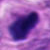

In [ ]:
row = annot_df_sub.iloc[24]
extract_patch(
    image_id=image_id,
    image_root=root,
    bbox=eval(row.bbox),
    level=level,
    save_path=None,
    image_format="tiff"
)


In [ ]:
# Sample up to 5 rows for each category_id in annot_df_sub
sampled_df = annot_df_sub.groupby('category_id').apply(lambda x: x.sample(n=min(5, len(x)), random_state=42)).reset_index(drop=True)

/scratch/tmp/28348667.1.default.q/ipykernel_443154/4080264795.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = annot_df_sub.groupby('category_id').apply(lambda x: x.sample(n=min(5, len(x)), random_state=42)).reset_index(drop=True)


(10, 5)

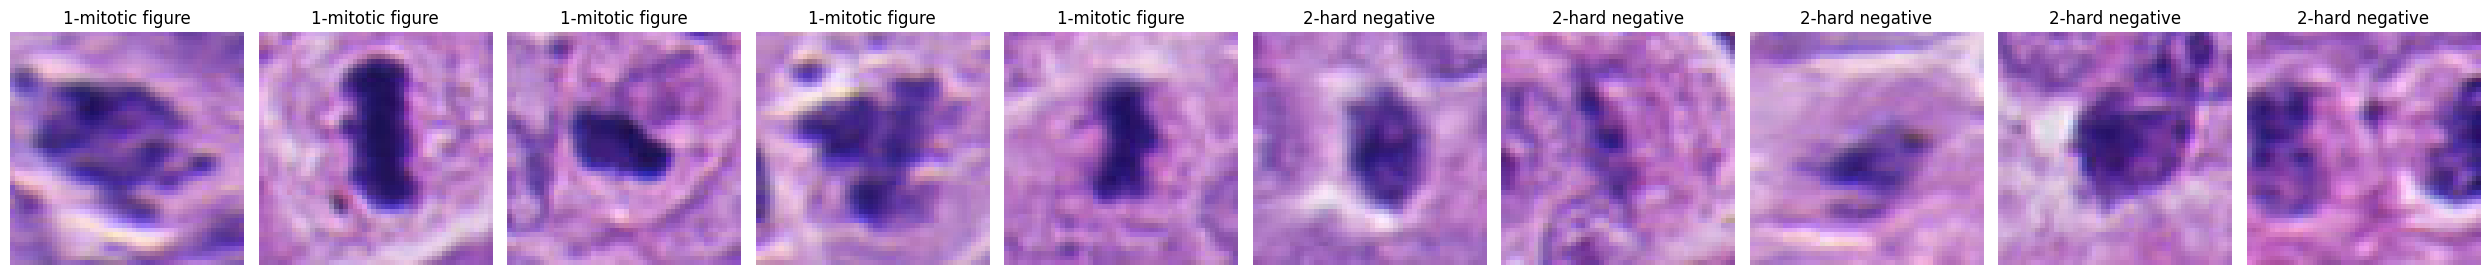

In [ ]:
# Plot each patch from sampled_df using extract_patch
plt.figure(figsize=(25, 5))
for i, row in sampled_df.iterrows():
    try:
        patch_img = extract_patch(
            image_id=image_id,
            image_root=root,
            bbox=row.bbox,
            level=level,
            save_path=None,
            image_format="tiff"
        )
        plt.subplot(1, len(sampled_df), i + 1)
        plt.imshow(patch_img)
        plt.title(f"{row.category_id}-{anno_dict[row.category_id]}")
        plt.axis('off')
    except Exception as err:
        print(i, row)
        print(err.__str__())
plt.tight_layout()
plt.show()

In [ ]:
compress_directory_in_chunks("/dlab/imaging/CHBS-VIRTUAL-I22129/users/zhangxeh/mitosis_detection/patches", "zipped_patches", max_size=10 * 1024 * 1024)